In [1]:
import os
import re
import sys
import time
import tweepy
import json
import datetime 
import collections
import numpy as np
import pandas as pd
import seaborn as sns
import dateutil.parser
import matplotlib as mpl
import matplotlib.pyplot as plt
from collections import Counter
from tweepy import OAuthHandler
from wordcloud import WordCloud
from matplotlib.lines import Line2D
from IPython.display import clear_output
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [2]:
log = pd.read_csv('Login.csv')
consumerKey = log['key'][0]
consumerSecret = log['key'][1]
accesToken = log['key'][2]
accesTokenSecret = log['key'][3]
bearer_token = log['key'][4]
authenticate = tweepy.OAuthHandler(consumerKey, consumerSecret)
authenticate.set_access_token(accesToken, accesTokenSecret)
api = tweepy.API(authenticate, wait_on_rate_limit = True)
client = tweepy.Client(bearer_token = bearer_token, wait_on_rate_limit=True)

In [3]:
#Mexico woeid = 23424900
#CDMX woeid = 116545
#US woeid = 23424977
#NewYork woeid = 2459115
#London woeid = 44418
#World woeid = 1

woeid = 1
trend_name_lst = []
trend_count_lst = []

trends = api.get_place_trends(id = woeid)
for value in trends:
    for trend in value['trends']:
        trend_name_lst.append(trend['name'])
        trend_count_lst.append(trend['tweet_volume'])

df_trend = pd.DataFrame(trend_name_lst, columns=['trend'])
df_trend['count'] = trend_count_lst
df_trend['date'] = datetime.date.today()
df_trend.to_csv('trend.csv')
df_trend_asc = df_trend.sort_values("count", ascending=False)
df_trend_asc

,trend,count,date
3,Amber,1432878.0,2022-06-01
13,Johnny Depp,1314649.0,2022-06-01
16,Messi,778017.0,2022-06-01
17,Argentina,625701.0,2022-06-01
5,Tulsa,199903.0,2022-06-01
6,Shakira,157226.0,2022-06-01
12,#2022BTSFESTA,112315.0,2022-06-01
31,Oklahoma,111469.0,2022-06-01
2,#AEWDynamite,88504.0,2022-06-01
38,Pirates,61122.0,2022-06-01


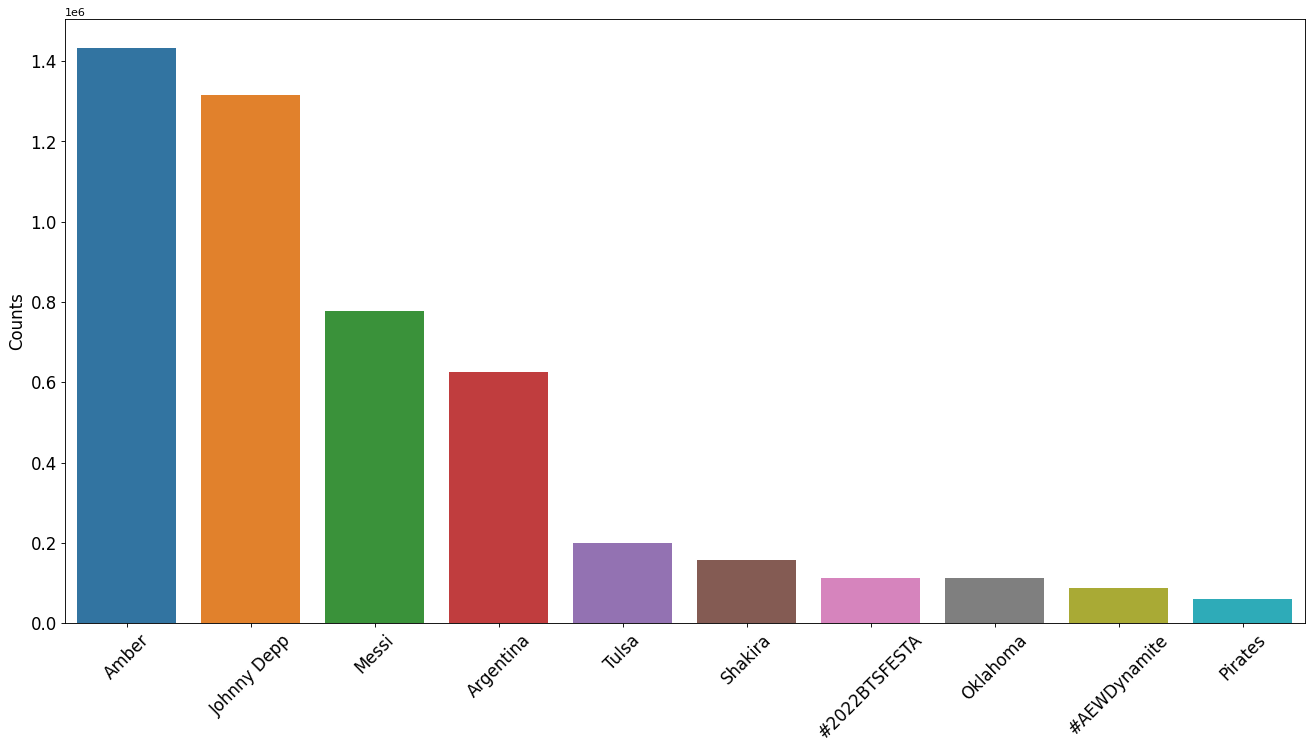

In [4]:
f, ax = plt.subplots(figsize = (20, 10), dpi= 80)
sns.barplot(x = 'trend', y = 'count', data = df_trend_asc[0:10])
plt.xticks(rotation = 45)
plt.ylabel('Counts', fontsize = 15)
plt.xlabel('', fontsize = 10)
plt.tick_params(axis = 'x', labelsize = 15)
plt.tick_params(axis = 'y', labelsize = 15)

In [5]:
date_lst = []
count_lst = []
start_lst = ['2022-01-01T00:00:00Z', '2022-02-01T00:00:00Z', '2022-03-01T00:00:00Z', '2022-04-01T00:00:00Z', '2022-05-01T00:00:00Z']
end_lst = ['2022-02-01T00:00:00Z', '2022-03-01T00:00:00Z', '2022-04-01T00:00:00Z', '2022-05-01T00:00:00Z', '2022-06-02T00:00:00Z']
query = 'Amber Heard -is:retweet' #place_country:US, OR, has:media, lang:en

for i in range(0,len(start_lst)):

  counts = client.get_all_tweets_count(query = query, start_time = start_lst[i], end_time = end_lst[i], granularity='day')

  for count in counts.data:

    count_lst.append(count['tweet_count'])
    d = dateutil.parser.parse(str(count['start']))
    date_lst.append(d.strftime('%m/%d/%Y'))

df_count = pd.DataFrame(date_lst, columns=['Day'])
df_count['Count'] = count_lst
df_count

,Day,Count
0,01/01/2022,249
1,01/02/2022,248
2,01/03/2022,281
3,01/04/2022,362
4,01/05/2022,402
...,...,...
146,05/27/2022,37579
147,05/28/2022,21253
148,05/29/2022,15467
149,05/30/2022,18683


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


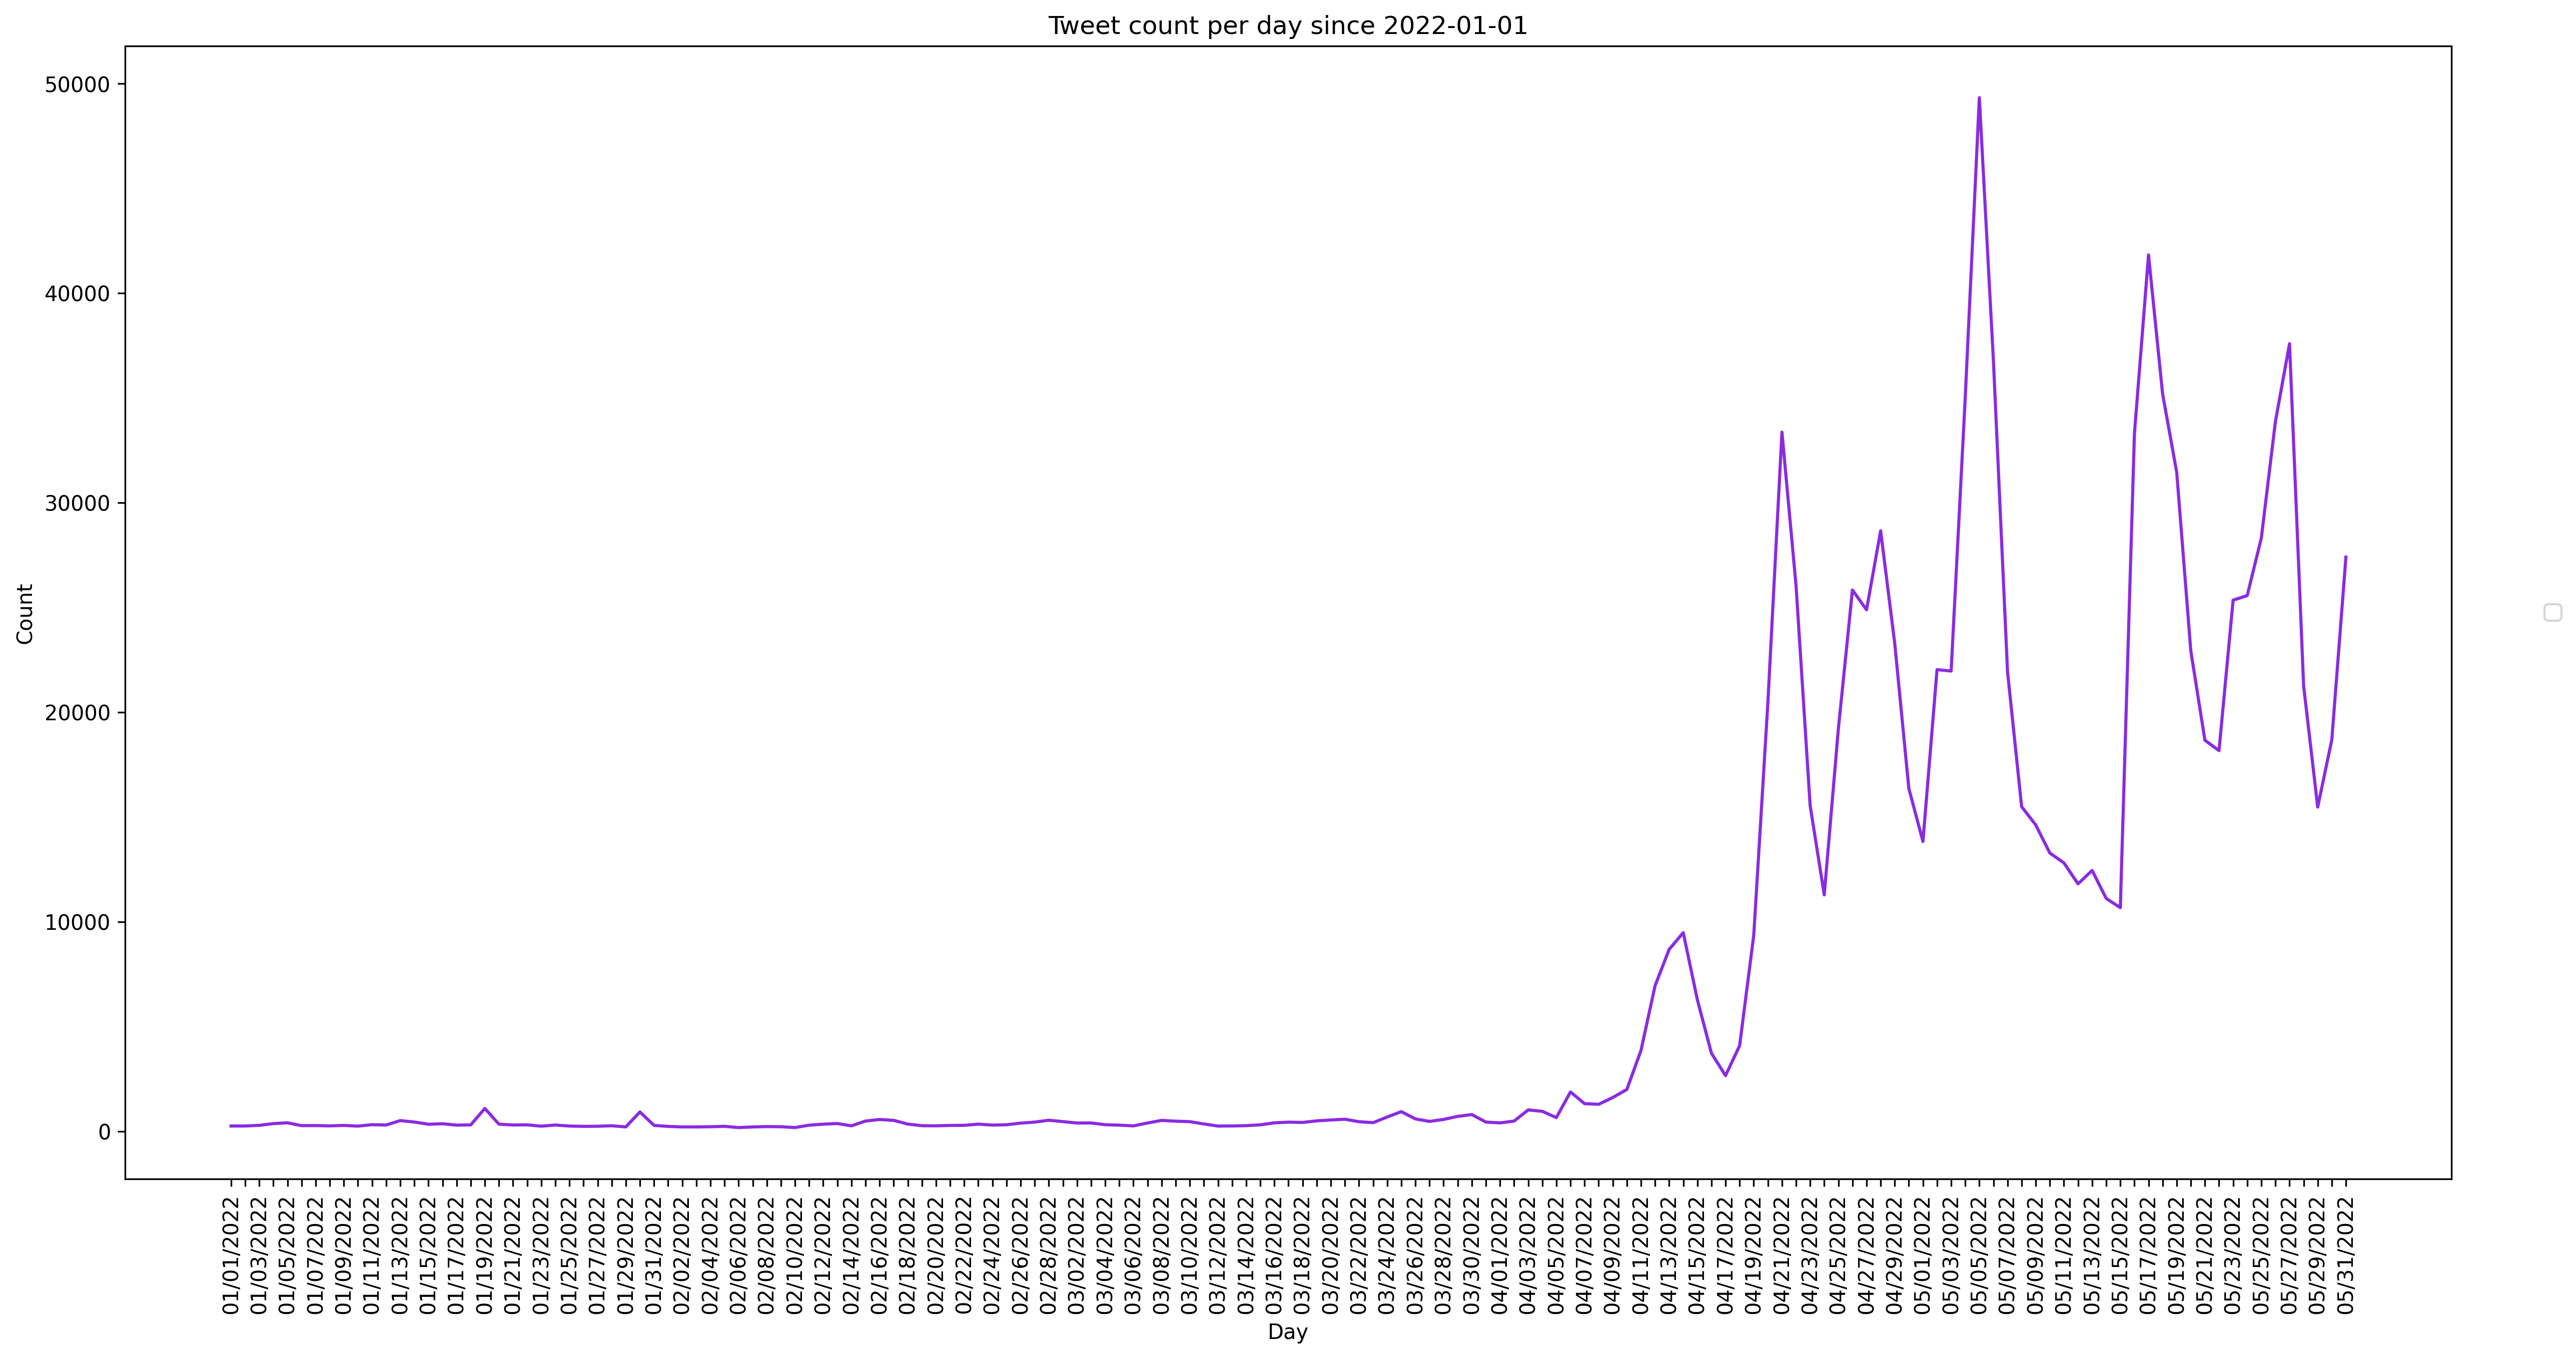

In [20]:
f, ax = plt.subplots(figsize = (20, 10), dpi= 300)
sns.lineplot(x = "Day", y = "Count", data = df_count, color = 'blueviolet').set_title("Tweet count per day since 2022-01-01")
plt.tick_params(axis = 'x', labelrotation = 90)
plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)
for label in ax.get_xticklabels()[1::2]:
    label.set_visible(False)
plt.show()

In [7]:
start_date_lst = pd.date_range(start="2022-01-01",end="2022-05-31").to_pydatetime().tolist()
end_date_lst = pd.date_range(start="2022-01-02",end="2022-06-02").to_pydatetime().tolist()
start_date_conv = []
end_date_conv = []

for date in start_date_lst:
  dateconv=pd.to_datetime(date).strftime('%Y-%m-%dT%H:%M:%SZ')
  start_date_conv.append(dateconv)

for date in end_date_lst:
  dateconv=pd.to_datetime(date).strftime('%Y-%m-%dT%H:%M:%SZ')
  end_date_conv.append(dateconv)

tweet_lst = []
tweet_date =[]
tweet_query = 'Amber Heard -is:retweet lang:en'

for i in range(0,len(start_date_conv)):

  response = client.search_all_tweets(query = tweet_query, tweet_fields=['created_at'], start_time = start_date_conv[i], end_time = end_date_conv[i], max_results = 500)
  time.sleep(1.0)

  for tweet in response.data:

    tweet_lst.append([tweet.text])
    tweet_date.append(tweet.created_at.strftime('%m/%d/%Y'))
    
df_tweet = pd.DataFrame(tweet_lst, columns=['tweet'])
df_tweet['date']=tweet_date
df_tweet

,tweet,date
0,@sansevieriafilm Naa Amber Heard should be hel...,01/01/2022
1,#BoycottWB \nJohnny Depp \n#AmberHeardIsTheRea...,01/01/2022
2,@RealTimewithWes @dabatman_ @AJCI282002 I’m wo...,01/01/2022
3,random shower thought:\nwhy was Amber heard ca...,01/01/2022
4,@Marky8681 Aye I heard that amber is nice I’ll...,01/01/2022
...,...,...
57379,Bruh if Amber Heard does win I look forward to...,05/31/2022
57380,Remove Amber Heard as ACLU Ambassador of Women...,05/31/2022
57381,@Junelikesrobots @heavensrun @TonyV6815 @starw...,05/31/2022
57382,Did You Know That Amber Heard ... #Shorts http...,05/31/2022


In [8]:
hashtag_lst = []

for tweet in df_tweet['tweet']:
  hashtag = re.findall(r"#(\w+)", tweet)
  hashtag_lst.append(hashtag)

hashtag_lst_clean =  list(filter(lambda x: x, hashtag_lst))

hashtag_list2 = []

for l in hashtag_lst_clean :
    for str in l:
      hashtag_list2.append(str)

hashtag_dict = Counter(hashtag_list2)
df_hashtags = pd.DataFrame(list(hashtag_dict.items()), columns = ['Hashtag','Counts'])
df_hashtags_asc = df_hashtags.sort_values("Counts", ascending=False)
df_hashtags_asc

,Hashtag,Counts
7,JusticeForJohnnyDepp,3129
13,JohnnyDepp,1441
12,AmberHeard,1427
15,AmberHeardIsAnAbuser,1079
14,AmberHeardIsALiar,1003
...,...,...
2102,closet,1
2103,cmonman,1
2104,whodey,1
2105,compete,1


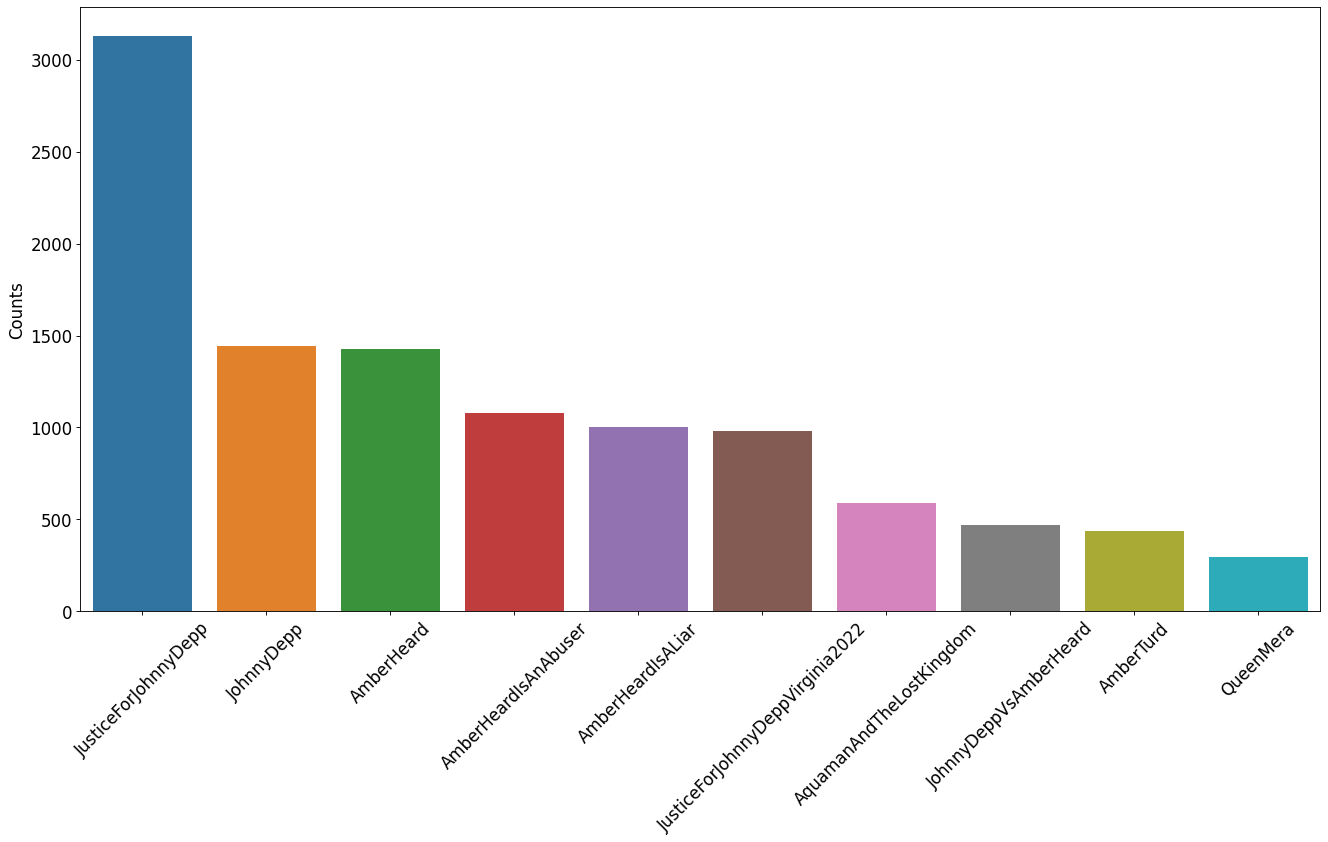

In [9]:
f, ax = plt.subplots(figsize = (20, 10), dpi= 80)
sns.barplot(x = 'Hashtag', y = 'Counts', data = df_hashtags_asc[0:10])
plt.xticks(rotation = 45)
plt.ylabel('Counts', fontsize = 15)
plt.xlabel('', fontsize = 10)
plt.tick_params(axis = 'x', labelsize = 15)
plt.tick_params(axis = 'y', labelsize = 15)

In [10]:
def cleanTwt(twt):
  twt = re.sub(r'@[A-Za-z0-9]+', ' ', twt)
  twt = re.sub(r'[^A-Za-z ]', ' ', twt)  
  twt = re.sub(r'#', ' ', twt) 
  twt = re.sub(r'RT[\s]+', ' ', twt) 
  twt = re.sub(r'https?:\/\/\S+', ' ', twt) 
  twt = re.sub(r'https', ' ', twt)
  twt = re.sub(r'http', ' ', twt)
  twt = re.sub(r'http?:\/\/\S+', ' ', twt) 
  twt = re.sub(r'_', ' ', twt) 
  twt = re.sub(r'-', ' ', twt) 
  twt = re.sub(r'\n', ' ', twt) 
  twt = re.sub(r'&amp', ' ', twt) 

  return twt


df_tweet['cleaned_tweet'] = df_tweet['tweet'].apply(cleanTwt)
df_tweet

,tweet,date,cleaned_tweet
0,@sansevieriafilm Naa Amber Heard should be hel...,01/01/2022,Naa Amber Heard should be held accountable ...
1,#BoycottWB \nJohnny Depp \n#AmberHeardIsTheRea...,01/01/2022,BoycottWB Johnny Depp AmberHeardIsTheRealA...
2,@RealTimewithWes @dabatman_ @AJCI282002 I’m wo...,01/01/2022,I m worried about the Aquaman movie ...
3,random shower thought:\nwhy was Amber heard ca...,01/01/2022,random shower thought why was Amber heard cas...
4,@Marky8681 Aye I heard that amber is nice I’ll...,01/01/2022,Aye I heard that amber is nice I ll need to ...
...,...,...,...
57379,Bruh if Amber Heard does win I look forward to...,05/31/2022,Bruh if Amber Heard does win I look forward to...
57380,Remove Amber Heard as ACLU Ambassador of Women...,05/31/2022,Remove Amber Heard as ACLU Ambassador of Women...
57381,@Junelikesrobots @heavensrun @TonyV6815 @starw...,05/31/2022,Amber Heard is well let s face it ...
57382,Did You Know That Amber Heard ... #Shorts http...,05/31/2022,Did You Know That Amber Heard Shorts ...


In [11]:
def getPolarity(text):
  
  sid = SentimentIntensityAnalyzer()

  return sid.polarity_scores(text)


df_tweet['tweet_sentiment'] = df_tweet['cleaned_tweet'].apply(getPolarity)
df_tweet.head()

,tweet,date,cleaned_tweet,tweet_sentiment
0,@sansevieriafilm Naa Amber Heard should be hel...,01/01/2022,Naa Amber Heard should be held accountable ...,"{'neg': 0.0, 'neu': 0.838, 'pos': 0.162, 'comp..."
1,#BoycottWB \nJohnny Depp \n#AmberHeardIsTheRea...,01/01/2022,BoycottWB Johnny Depp AmberHeardIsTheRealA...,"{'neg': 0.15, 'neu': 0.85, 'pos': 0.0, 'compou..."
2,@RealTimewithWes @dabatman_ @AJCI282002 I’m wo...,01/01/2022,I m worried about the Aquaman movie ...,"{'neg': 0.145, 'neu': 0.855, 'pos': 0.0, 'comp..."
3,random shower thought:\nwhy was Amber heard ca...,01/01/2022,random shower thought why was Amber heard cas...,"{'neg': 0.0, 'neu': 0.807, 'pos': 0.193, 'comp..."
4,@Marky8681 Aye I heard that amber is nice I’ll...,01/01/2022,Aye I heard that amber is nice I ll need to ...,"{'neg': 0.0, 'neu': 0.726, 'pos': 0.274, 'comp..."


In [12]:
df_tweet['compound'] = df_tweet['tweet_sentiment'].apply(lambda score_dict: score_dict['compound'])
df_tweet['sentiment_type']=''
df_tweet.loc[df_tweet.compound>0,'sentiment_type']='POSITIVE'
df_tweet.loc[df_tweet.compound==0,'sentiment_type']='NEUTRAL'
df_tweet.loc[df_tweet.compound<0,'sentiment_type']='NEGATIVE'
df_tweet

,tweet,date,cleaned_tweet,tweet_sentiment,compound,sentiment_type
0,@sansevieriafilm Naa Amber Heard should be hel...,01/01/2022,Naa Amber Heard should be held accountable ...,"{'neg': 0.0, 'neu': 0.838, 'pos': 0.162, 'comp...",0.4404,POSITIVE
1,#BoycottWB \nJohnny Depp \n#AmberHeardIsTheRea...,01/01/2022,BoycottWB Johnny Depp AmberHeardIsTheRealA...,"{'neg': 0.15, 'neu': 0.85, 'pos': 0.0, 'compou...",-0.3182,NEGATIVE
2,@RealTimewithWes @dabatman_ @AJCI282002 I’m wo...,01/01/2022,I m worried about the Aquaman movie ...,"{'neg': 0.145, 'neu': 0.855, 'pos': 0.0, 'comp...",-0.2960,NEGATIVE
3,random shower thought:\nwhy was Amber heard ca...,01/01/2022,random shower thought why was Amber heard cas...,"{'neg': 0.0, 'neu': 0.807, 'pos': 0.193, 'comp...",0.6705,POSITIVE
4,@Marky8681 Aye I heard that amber is nice I’ll...,01/01/2022,Aye I heard that amber is nice I ll need to ...,"{'neg': 0.0, 'neu': 0.726, 'pos': 0.274, 'comp...",0.5994,POSITIVE
...,...,...,...,...,...,...
57379,Bruh if Amber Heard does win I look forward to...,05/31/2022,Bruh if Amber Heard does win I look forward to...,"{'neg': 0.176, 'neu': 0.637, 'pos': 0.186, 'co...",0.0516,POSITIVE
57380,Remove Amber Heard as ACLU Ambassador of Women...,05/31/2022,Remove Amber Heard as ACLU Ambassador of Women...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,NEUTRAL
57381,@Junelikesrobots @heavensrun @TonyV6815 @starw...,05/31/2022,Amber Heard is well let s face it ...,"{'neg': 0.0, 'neu': 0.884, 'pos': 0.116, 'comp...",0.2732,POSITIVE
57382,Did You Know That Amber Heard ... #Shorts http...,05/31/2022,Did You Know That Amber Heard Shorts ...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,NEUTRAL


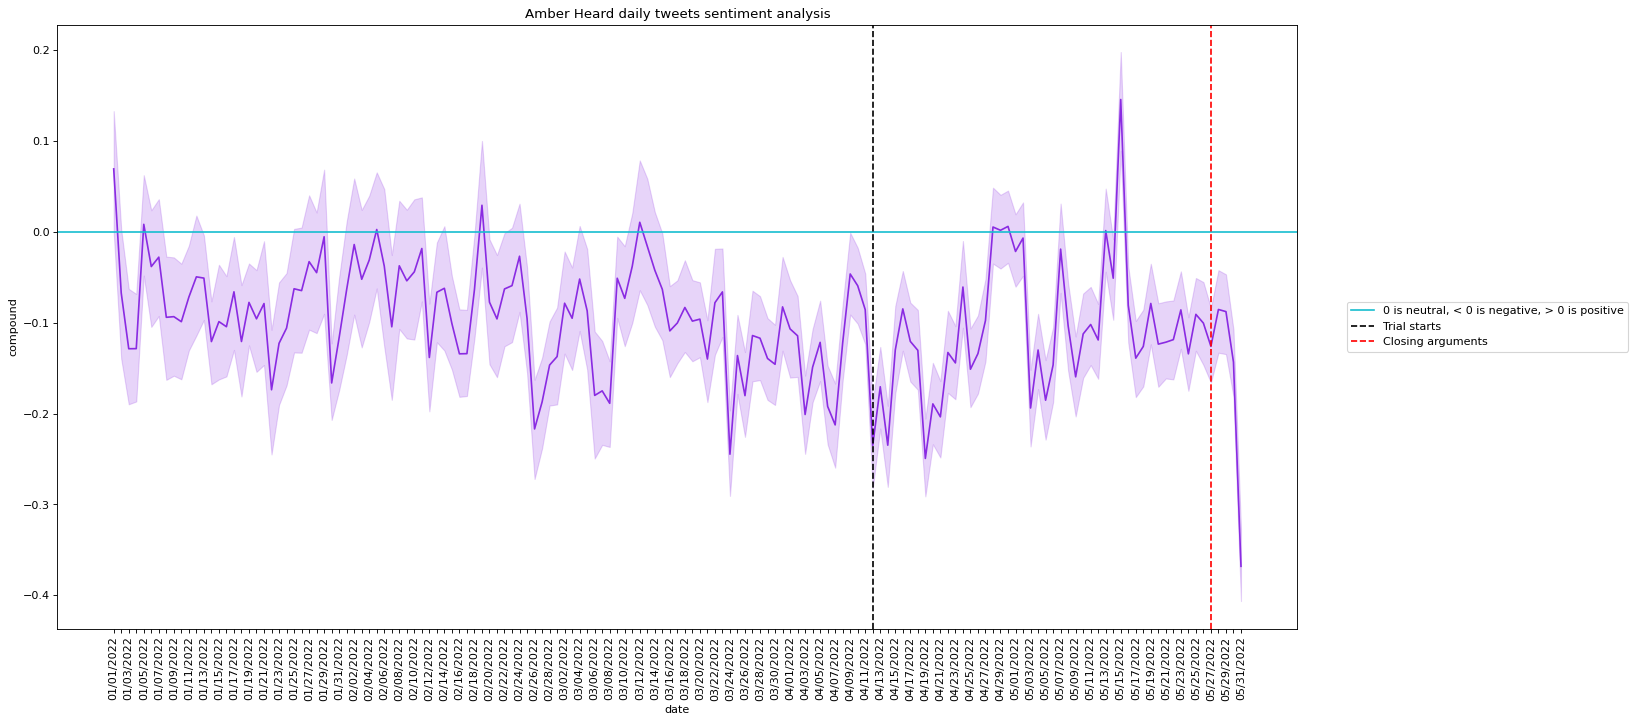

In [14]:
f, ax = plt.subplots(figsize = (20, 10), dpi= 80)
sns.lineplot(x = "date", y = ("compound"), data = df_tweet, color = 'blueviolet', estimator='mean', err_style="band", ci=95).set_title("Amber Heard daily tweets sentiment analysis")
ax.axhline(0, color = 'tab:cyan', label='0 is neutral, < 0 is negative, > 0 is positive')
ax.axvline('04/12/2022', color = 'black', ls='--', label='Trial starts')
ax.axvline('05/27/2022', color = 'red', ls='--', label = 'Closing arguments')
plt.tick_params(axis = 'x', labelrotation = 90)
plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)
for label in ax.get_xticklabels()[1::2]:
    label.set_visible(False)
plt.show()

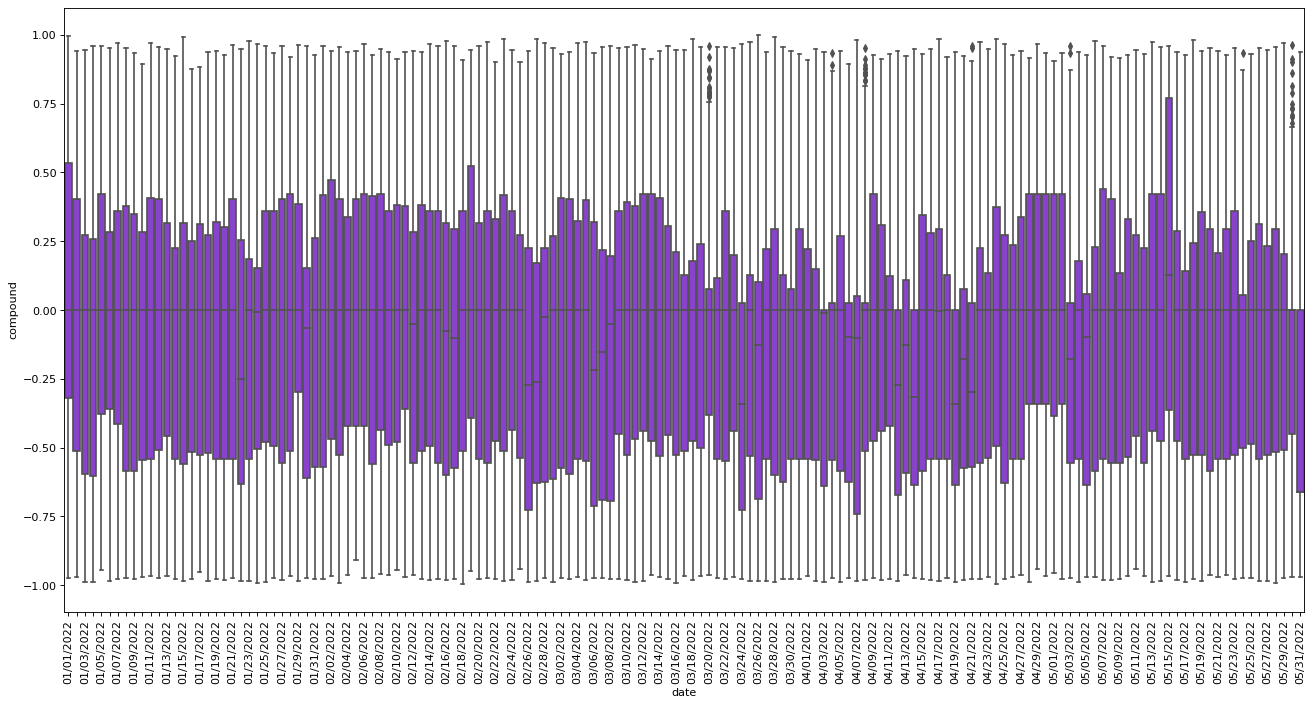

In [15]:
f, ax = plt.subplots(figsize = (20, 10), dpi= 80)
sns.boxplot(x = "date", y = ("compound"), data = df_tweet, color = 'blueviolet').set_title("")
plt.tick_params(axis = 'x', labelrotation = 90)
for label in ax.get_xticklabels()[1::2]:
    label.set_visible(False)
plt.show()

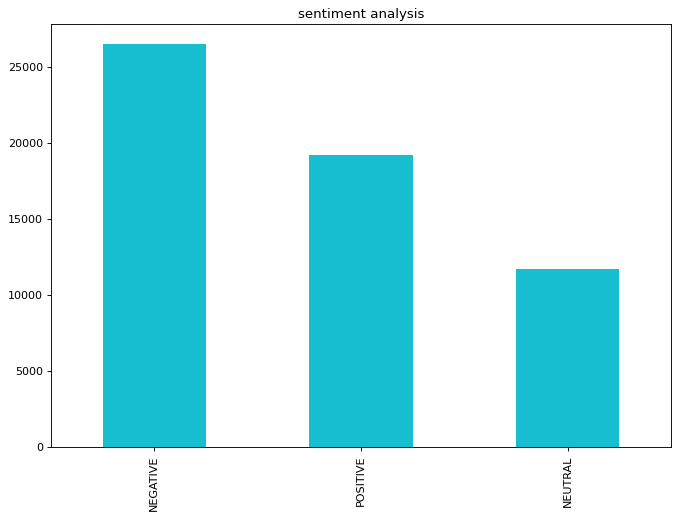

In [16]:
plt.figure(figsize=(10, 7), dpi= 80)
df_tweet.sentiment_type.value_counts().plot(kind='bar',title="sentiment analysis", color = 'tab:cyan')
plt.show()

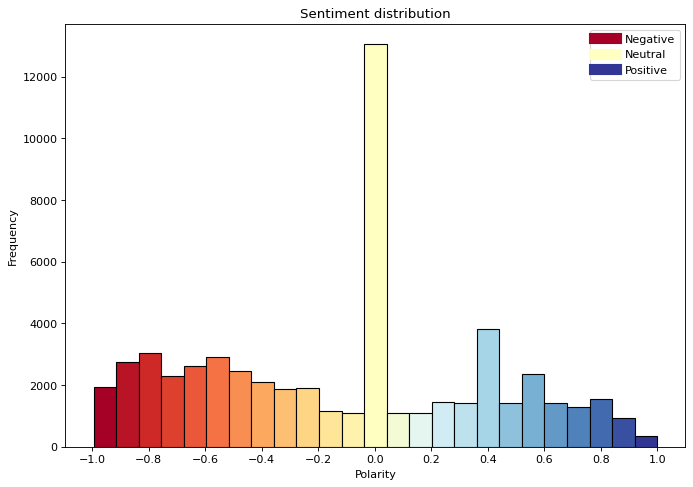

In [17]:
plt.figure(figsize=(10, 7), dpi= 80)
cm = plt.cm.get_cmap('RdYlBu')
n, bins, patches = plt.hist(df_tweet['compound'], 25, edgecolor='black', linewidth=1)
bin_centers = 0.5 * (bins[:-1] + bins[1:])
col = bin_centers - min(bin_centers)
col /= max(col)

for c, p in zip(col, patches):
    plt.setp(p, 'facecolor', cm(c))

plt.title('Sentiment distribution')
plt.xlabel('Polarity')
plt.xticks(np.arange(-1.0, 1.1, step=0.2))
plt.ylabel('Frequency')

custom_lines = [Line2D([0], [0], color=cm(0.), lw=10),
                Line2D([0], [0], color=cm(.5), lw=10),
                Line2D([0], [0], color=cm(1.), lw=10)]

plt.legend(custom_lines, ['Negative', 'Neutral', 'Positive'])
plt.show()

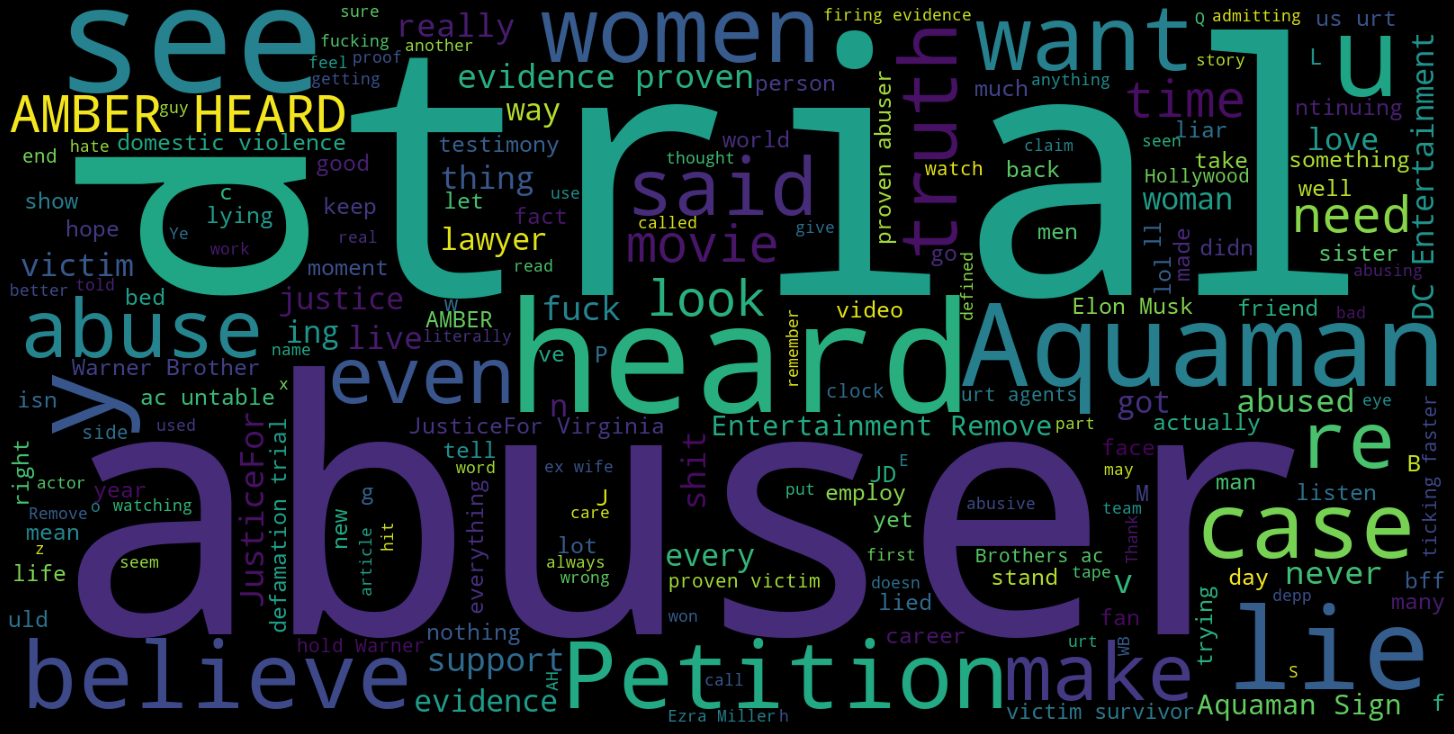

In [19]:
def cleanTwt2(twt):
  twt = re.sub(r'Johnny Depp', ' ', twt)
  twt = re.sub(r'JohnnyDepp', ' ', twt)
  twt = re.sub(r'johnny depp', ' ', twt)
  twt = re.sub(r'Johnny', ' ', twt)   
  twt = re.sub(r'johnny', ' ', twt) 
  twt = re.sub(r'Depp', ' ', twt) 
  twt = re.sub(r'Amber Heard', ' ', twt)
  twt = re.sub(r'amber heard', ' ', twt)
  twt = re.sub(r'Amber heard', ' ', twt)
  twt = re.sub(r'Amber Heard ', ' ', twt)
  twt = re.sub(r'Amber', ' ', twt)
  twt = re.sub(r'Heard', ' ', twt)
  twt = re.sub(r'will', ' ', twt)
  twt = re.sub(r'still', ' ', twt)
  twt = re.sub(r'know', ' ', twt)
  twt = re.sub(r'via', ' ', twt)
  twt = re.sub(r'one', ' ', twt)
  twt = re.sub(r'think', ' ', twt)
  twt = re.sub(r'going', ' ', twt)
  twt = re.sub(r'co', ' ', twt)
  twt = re.sub(r'say', ' ', twt)
  twt = re.sub(r'now', ' ', twt)
  twt = re.sub(r'people', ' ', twt)
  twt = re.sub(r'amp', ' ', twt)
  twt = re.sub(r' m ', ' ', twt)
  twt = re.sub(r' s ', ' ', twt)
  twt = re.sub(r' t ', ' ', twt)
  twt = re.sub(r' don ', ' ', twt)

  return twt


df_tweet['word_cloud'] = df_tweet['cleaned_tweet'].apply(cleanTwt2)

allWords = ' '.join([twts for twts in df_tweet['word_cloud']])
wordCloud = WordCloud(width=1600, height=800).generate(allWords)
plt.figure(figsize=(20, 10), facecolor='k')
plt.imshow(wordCloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()